<a href="https://colab.research.google.com/github/bcury/R---Machine-Learning/blob/main/R_ML_RandomForest_housing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
housing = read_csv('/content/housing.csv')

Rows: 20640 Columns: 10

── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): ocean_proximity
dbl (9): longitude, latitude, housing_median_age, total_rooms, total_bedroom...


ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.



In [5]:
head(housing)

longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
-122.23,37.88,41,880,129,322,126,8.3252,452600,NEAR BAY
-122.22,37.86,21,7099,1106,2401,1138,8.3014,358500,NEAR BAY
-122.24,37.85,52,1467,190,496,177,7.2574,352100,NEAR BAY
-122.25,37.85,52,1274,235,558,219,5.6431,341300,NEAR BAY
-122.25,37.85,52,1627,280,565,259,3.8462,342200,NEAR BAY
-122.25,37.85,52,919,213,413,193,4.0368,269700,NEAR BAY


In [6]:
summary(housing)

   longitude         latitude     housing_median_age  total_rooms   
 Min.   :-124.3   Min.   :32.54   Min.   : 1.00      Min.   :    2  
 1st Qu.:-121.8   1st Qu.:33.93   1st Qu.:18.00      1st Qu.: 1448  
 Median :-118.5   Median :34.26   Median :29.00      Median : 2127  
 Mean   :-119.6   Mean   :35.63   Mean   :28.64      Mean   : 2636  
 3rd Qu.:-118.0   3rd Qu.:37.71   3rd Qu.:37.00      3rd Qu.: 3148  
 Max.   :-114.3   Max.   :41.95   Max.   :52.00      Max.   :39320  
                                                                    
 total_bedrooms     population      households     median_income    
 Min.   :   1.0   Min.   :    3   Min.   :   1.0   Min.   : 0.4999  
 1st Qu.: 296.0   1st Qu.:  787   1st Qu.: 280.0   1st Qu.: 2.5634  
 Median : 435.0   Median : 1166   Median : 409.0   Median : 3.5348  
 Mean   : 537.9   Mean   : 1425   Mean   : 499.5   Mean   : 3.8707  
 3rd Qu.: 647.0   3rd Qu.: 1725   3rd Qu.: 605.0   3rd Qu.: 4.7432  
 Max.   :6445.0   Max.   :35682   

In [7]:
par(mfrow=c(2,5))

In [8]:
colnames(housing)

[1] "longitude"          "latitude"           "housing_median_age"
 [4] "total_rooms"        "total_bedrooms"     "population"        
 [7] "households"         "median_income"      "median_house_value"
[10] "ocean_proximity"

In [15]:
install.packages('reshape2')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘plyr’




In [16]:
library(tidyverse)
library(reshape2)


Attaching package: ‘reshape2’


The following object is masked from ‘package:tidyr’:

    smiths




Using ocean_proximity as id variables

Warning message:
“Removed 207 rows containing non-finite values (stat_bin).”


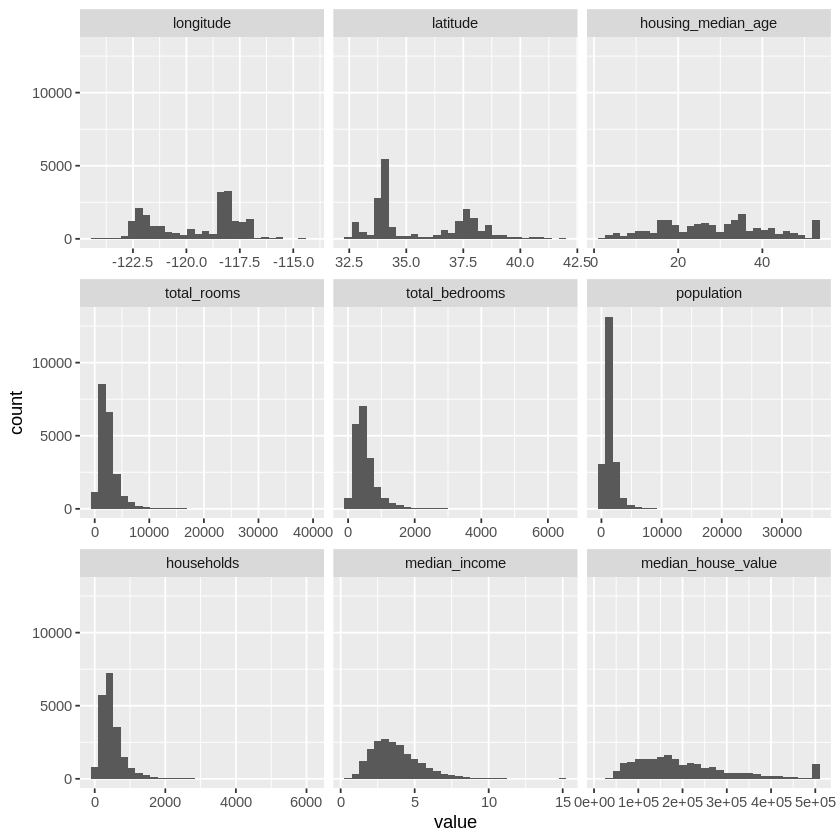

In [17]:
ggplot(data = melt(housing), mapping = aes(x = value)) + geom_histogram(bins = 30) + facet_wrap(~variable, scales = 'free_x')

tratamento de valores vazios

In [18]:
housing$total_bedrooms[is.na(housing$total_bedrooms)] = median(housing$total_bedrooms , na.rm = TRUE)

In [19]:
housing$mean_bedrooms = housing$total_bedrooms/housing$households
housing$mean_rooms = housing$total_rooms/housing$households

In [20]:
drops = c('total_bedrooms', 'total_rooms')

housing = housing[ , !(names(housing) %in% drops)]

In [21]:
head(housing)

longitude,latitude,housing_median_age,population,households,median_income,median_house_value,ocean_proximity,mean_bedrooms,mean_rooms
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>
-122.23,37.88,41,322,126,8.3252,452600,NEAR BAY,1.0238095,6.984127
-122.22,37.86,21,2401,1138,8.3014,358500,NEAR BAY,0.9718805,6.238137
-122.24,37.85,52,496,177,7.2574,352100,NEAR BAY,1.0734463,8.288136
-122.25,37.85,52,558,219,5.6431,341300,NEAR BAY,1.0730594,5.817352
-122.25,37.85,52,565,259,3.8462,342200,NEAR BAY,1.0810811,6.281853
-122.25,37.85,52,413,193,4.0368,269700,NEAR BAY,1.1036269,4.761658


passando categoricos para boleanos

In [22]:
categories = unique(housing$ocean_proximity)
#split the categories off
cat_housing = data.frame(ocean_proximity = housing$ocean_proximity)

In [23]:
for(cat in categories){
    cat_housing[,cat] = rep(0, times= nrow(cat_housing))
}
head(cat_housing) #see the new columns on the right

,ocean_proximity,NEAR BAY,<1H OCEAN,INLAND,NEAR OCEAN,ISLAND
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,NEAR BAY,0,0,0,0,0
2,NEAR BAY,0,0,0,0,0
3,NEAR BAY,0,0,0,0,0
4,NEAR BAY,0,0,0,0,0
5,NEAR BAY,0,0,0,0,0
6,NEAR BAY,0,0,0,0,0


In [24]:
for(i in 1:length(cat_housing$ocean_proximity)){
    cat = as.character(cat_housing$ocean_proximity[i])
    cat_housing[,cat][i] = 1
}

head(cat_housing)

,ocean_proximity,NEAR BAY,<1H OCEAN,INLAND,NEAR OCEAN,ISLAND
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,NEAR BAY,1,0,0,0,0
2,NEAR BAY,1,0,0,0,0
3,NEAR BAY,1,0,0,0,0
4,NEAR BAY,1,0,0,0,0
5,NEAR BAY,1,0,0,0,0
6,NEAR BAY,1,0,0,0,0


In [25]:
cat_columns = names(cat_housing)
keep_columns = cat_columns[cat_columns != 'ocean_proximity']
cat_housing = select(cat_housing,one_of(keep_columns))

tail(cat_housing)

,NEAR BAY,<1H OCEAN,INLAND,NEAR OCEAN,ISLAND
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
20635,0,0,1,0,0
20636,0,0,1,0,0
20637,0,0,1,0,0
20638,0,0,1,0,0
20639,0,0,1,0,0
20640,0,0,1,0,0


In [26]:
colnames(housing)

[1] "longitude"          "latitude"           "housing_median_age"
 [4] "population"         "households"         "median_income"     
 [7] "median_house_value" "ocean_proximity"    "mean_bedrooms"     
[10] "mean_rooms"

In [27]:
drops = c('ocean_proximity','median_house_value')
housing_num =  housing[ , !(names(housing) %in% drops)]

In [28]:
head(housing_num)

longitude,latitude,housing_median_age,population,households,median_income,mean_bedrooms,mean_rooms
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
-122.23,37.88,41,322,126,8.3252,1.0238095,6.984127
-122.22,37.86,21,2401,1138,8.3014,0.9718805,6.238137
-122.24,37.85,52,496,177,7.2574,1.0734463,8.288136
-122.25,37.85,52,558,219,5.6431,1.0730594,5.817352
-122.25,37.85,52,565,259,3.8462,1.0810811,6.281853
-122.25,37.85,52,413,193,4.0368,1.1036269,4.761658


In [29]:
scaled_housing_num = scale(housing_num)

In [30]:
head(scaled_housing_num)

longitude,latitude,housing_median_age,population,households,median_income,mean_bedrooms,mean_rooms
-1.327803,1.052523,0.9821189,-0.9744050,-0.9770092,2.34470896,-0.148510661,0.6285442
-1.322812,1.043159,-0.6070042,0.8614180,1.6699206,2.33218146,-0.248535936,0.3270334
-1.332794,1.038478,1.8561366,-0.8207575,-0.8436165,1.78265622,-0.052900657,1.1555925
-1.337785,1.038478,1.8561366,-0.7660095,-0.7337637,0.93294491,-0.053646030,0.1569623
-1.337785,1.038478,1.8561366,-0.7598283,-0.6291419,-0.01288068,-0.038194658,0.3447024
-1.337785,1.038478,1.8561366,-0.8940491,-0.8017678,0.08744452,0.005232996,-0.2697231



Mesclar os dataframes numéricos e categóricos alterados

In [31]:
cleaned_housing = cbind(cat_housing, scaled_housing_num, median_house_value=housing$median_house_value)

In [32]:
head(cleaned_housing)

,NEAR BAY,<1H OCEAN,INLAND,NEAR OCEAN,ISLAND,longitude,latitude,housing_median_age,population,households,median_income,mean_bedrooms,mean_rooms,median_house_value
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,0,0,0,0,-1.327803,1.052523,0.9821189,-0.9744050,-0.9770092,2.34470896,-0.148510661,0.6285442,452600
2,1,0,0,0,0,-1.322812,1.043159,-0.6070042,0.8614180,1.6699206,2.33218146,-0.248535936,0.3270334,358500
3,1,0,0,0,0,-1.332794,1.038478,1.8561366,-0.8207575,-0.8436165,1.78265622,-0.052900657,1.1555925,352100
4,1,0,0,0,0,-1.337785,1.038478,1.8561366,-0.7660095,-0.7337637,0.93294491,-0.053646030,0.1569623,341300
5,1,0,0,0,0,-1.337785,1.038478,1.8561366,-0.7598283,-0.6291419,-0.01288068,-0.038194658,0.3447024,342200
6,1,0,0,0,0,-1.337785,1.038478,1.8561366,-0.8940491,-0.8017678,0.08744452,0.005232996,-0.2697231,269700


criando um data set de teste

In [33]:
set.seed(1738) # Set a random seed so that same sample can be reproduced in future runs

sample = sample.int(n = nrow(cleaned_housing), size = floor(.8*nrow(cleaned_housing)), replace = F)
train = cleaned_housing[sample, ] #just the samples
test  = cleaned_housing[-sample, ] #everything but the samples

In [34]:
head(train)

,NEAR BAY,<1H OCEAN,INLAND,NEAR OCEAN,ISLAND,longitude,latitude,housing_median_age,population,households,median_income,mean_bedrooms,mean_rooms,median_house_value
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
15797,1,0,0,0,0,-1.4226356,0.9963418,1.8561366,0.7360275,1.254049198,-0.7002610,-0.09402939,-0.71339265,250000
11425,0,1,0,0,0,0.7984423,-0.8997679,-0.2891796,0.1938460,-0.006642643,1.0257957,-0.26800948,0.46743428,286100
9208,0,0,1,0,0,-0.1399007,0.6873461,-1.6399342,-0.8940491,-0.924698320,-0.2609040,0.09587571,0.09790468,80700
8778,0,1,0,0,0,0.6287420,-0.8623139,0.5053819,-0.0454556,0.079670283,-0.3281734,-0.07443967,-0.44792541,254700
18375,0,1,0,0,0,-1.1431292,0.7482089,-0.3686357,0.4508082,0.398766559,1.0631150,-0.14119530,0.49424219,271400
19571,0,0,1,0,0,-0.6889312,0.9167520,1.1410312,-0.4975679,-0.438207278,-1.0654005,-0.06673316,-0.29391335,81500


In [35]:
nrow(train) + nrow(test) == nrow(cleaned_housing)

[1] TRUE

testar modelos preditivos

In [36]:
library('boot')

In [37]:
glm_house = glm(median_house_value~median_income+mean_rooms+population, data=cleaned_housing)
k_fold_cv_error = cv.glm(cleaned_housing , glm_house, K=5)

In [38]:
k_fold_cv_error$delta

[1] 6993810248 6983982760

In [39]:
glm_cv_rmse = sqrt(k_fold_cv_error$delta)[1]
glm_cv_rmse #off by about $83,000... it is a start

[1] 83629

In [40]:
names(glm_house) #what parts of the model are callable?


[1] "coefficients"      "residuals"         "fitted.values"    
 [4] "effects"           "R"                 "rank"             
 [7] "qr"                "family"            "linear.predictors"
[10] "deviance"          "aic"               "null.deviance"    
[13] "iter"              "weights"           "prior.weights"    
[16] "df.residual"       "df.null"           "y"                
[19] "converged"         "boundary"          "model"            
[22] "call"              "formula"           "terms"            
[25] "data"              "offset"            "control"          
[28] "method"            "contrasts"         "xlevels"

In [41]:
glm_house$coefficients

(Intercept) median_income    mean_rooms    population 
   206855.817     82608.959     -9755.442     -3948.293

MODELO RANDOM FOREST

In [45]:
install.packages('randomForest')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [48]:
library('randomForest')

In [49]:
names(train)

[1] "NEAR BAY"           "<1H OCEAN"          "INLAND"            
 [4] "NEAR OCEAN"         "ISLAND"             "longitude"         
 [7] "latitude"           "housing_median_age" "population"        
[10] "households"         "median_income"      "mean_bedrooms"     
[13] "mean_rooms"         "median_house_value"

In [50]:
set.seed(1738)

train_y = train[,'median_house_value']
train_x = train[, names(train) !='median_house_value']

head(train_y)
head(train_x)

[1] 250000 286100  80700 254700 271400  81500

,NEAR BAY,<1H OCEAN,INLAND,NEAR OCEAN,ISLAND,longitude,latitude,housing_median_age,population,households,median_income,mean_bedrooms,mean_rooms
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
15797,1,0,0,0,0,-1.4226356,0.9963418,1.8561366,0.7360275,1.254049198,-0.7002610,-0.09402939,-0.71339265
11425,0,1,0,0,0,0.7984423,-0.8997679,-0.2891796,0.1938460,-0.006642643,1.0257957,-0.26800948,0.46743428
9208,0,0,1,0,0,-0.1399007,0.6873461,-1.6399342,-0.8940491,-0.924698320,-0.2609040,0.09587571,0.09790468
8778,0,1,0,0,0,0.6287420,-0.8623139,0.5053819,-0.0454556,0.079670283,-0.3281734,-0.07443967,-0.44792541
18375,0,1,0,0,0,-1.1431292,0.7482089,-0.3686357,0.4508082,0.398766559,1.0631150,-0.14119530,0.49424219
19571,0,0,1,0,0,-0.6889312,0.9167520,1.1410312,-0.4975679,-0.438207278,-1.0654005,-0.06673316,-0.29391335


In [51]:
#some people like weird r format like this... I find it causes headaches
#rf_model = randomForest(median_house_value~. , data = train, ntree =500, importance = TRUE)
rf_model = randomForest(train_x, y = train_y , ntree = 500, importance = TRUE)

In [52]:
names(rf_model) #these are all the different things you can call from the model.

[1] "call"            "type"            "predicted"       "mse"            
 [5] "rsq"             "oob.times"       "importance"      "importanceSD"   
 [9] "localImportance" "proximity"       "ntree"           "mtry"           
[13] "forest"          "coefs"           "y"               "test"           
[17] "inbag"

In [53]:
rf_model$importance

,%IncMSE,IncNodePurity
NEAR BAY,486443080,1.312625e+12
<1H OCEAN,1621072507,4.289632e+12
INLAND,4045427703,3.068877e+13
NEAR OCEAN,539828604,2.299546e+12
ISLAND,1524086,6.496858e+10
longitude,6897270047,2.572075e+13
latitude,5710904041,2.255767e+13
housing_median_age,1082226582,9.661389e+12
population,1066423080,7.341037e+12
households,1193112832,7.923472e+12


erro estimado ( out of bag )

In [54]:
oob_prediction = predict(rf_model) #leaving out a data source forces OOB predictions

In [55]:
#you may have noticed that this is avaliable using the $mse in the model options.
#but this way we learn stuff!
train_mse = mean(as.numeric((oob_prediction - train_y)^2))
oob_rmse = sqrt(train_mse)
oob_rmse

[1] 49126.22

In [56]:
test_y = test[,'median_house_value']
test_x = test[, names(test) !='median_house_value']


Portanto, mesmo usando uma floresta aleatória de apenas 1000 árvores de decisão, podemos prever o preço médio de uma casa em um determinado distrito dentro de $ 49.000 do preço médio real da casa. Isso pode servir como nossa marca de seguir em frente e tentar outros modelos.

In [57]:
y_pred = predict(rf_model , test_x)
test_mse = mean(((y_pred - test_y)^2))
test_rmse = sqrt(test_mse)
test_rmse

[1] 47625.57

Nosso modelo teve quase a mesma pontuação nos dados de treinamento e teste, sugerindo que não é overfit e que faz boas previsões